# `NumericalSgps` an introduction - SSC 2023

In [1]:
LoadPackage("num");

true

## Minimal presentations

Let us recap some concepts from our last lesson. 

Let $S$ be a numerical semigroup minimally generated by $\{n_1,\dots,n_e\}$. Every element $s\in S$ admits an expression of the form $s=a_1n_1+\dots+ a_e n_e$, and for every $(a_1,\dots,a_e)\in \mathbb{N}^e$, the integer $a_1n_1+\dots+a_en_e\in S$. Thus, the following (monoid) morphism 
$$
\varphi_S: \mathbb{N}^e \to S,\ \varphi_S(a_1,\dots,a_e)=a_1n_1+\dots+a_en_e
$$
is surjective. There is an isomorphism theorem for monoids, and consequently we have that $\mathbb{N}^e/\ker \varphi_S$ is isomorphic to $S$ as a monoid, where $\ker \varphi_S=\{ (a,b)\in \mathbb{N}^e : \varphi_S(a)=\varphi_S(b)\}$. As a congruence, $\ker \varphi_S$ admints a system of generators, which is known as a presentation for $S$. 

A **minimal presentation** for $S$ is just a minimal generating system of $\ker \varphi_S$.

Given $s\in S$, the set $\varphi_S^{-1}(s)$ corresponds to all the expressions that $s$ migh have in terms of the minimal generators of $S$. We will call this set, the set of factorizations of $s$, and we will denote it by $\mathsf{Z}(s)$.

A set $\rho$ generates a congruence $\sigma$ on $\mathbb{N}^e$ if for any pair $(a,b)\in \sigma$ there exists a chain $a_1,\dots,a_n$ such that

- $a_1=a$, $a_n=b$,
- for all $i$, there exists $c_i\in \mathbb{N}^e$ and $(\alpha_i,\beta_i)$ such that $(a_i,a_{i+1})=(\alpha_i+c_i,\beta_i+c_i)$ and either $(\alpha_i,\beta_i)\in \rho$ or $(\beta_i,\alpha_i)\in \rho$.

You can see the sequence $a_1,\dots,a_n$ as a chain of transformations from $a$ to $b$, and at each step we are applying a relation (or trade) chanbe $\alpha_i$ by $\beta_i$ (or viceversa). 

Let $X$ be a subset of $\mathbb{N}^e$. We say that $x,y\in X$ are connected if there exists a sequence $x_1,\dots,x_n\in X$ (for some $n\in\mathbb{N}$) such that 

- $x_1=x$, $x_n=y$,
- for every $i$, $x_i$ and $x_{i+1}$ have common support.

The connected components of $X$ under this relation are called $R$-classes of $X$.

The idea is that whenever we are in the same $R$-class, we can connect any two factorizations with a chain where two consequtive elements have common support. For these two elements, we remove the common part, moving now to the factorizations of an element smaller than the original one. If these two new factorizations are in the same $R$-class, we repeat the process. This will end when we arrive at factorizations in different $R$-classes, and then we only have to connect all the chains that we found translated accordingly. 

Elements with more than one $R$-class are called **Betti elements** (or degrees) of $S$.

It is not hard to prove that if $s\in S$ is a Betti element, then $s=n_i+w$ with $i>2$ and $w\in \operatorname{Ap}(S,n_1)$. Thus the number of Betti elements is finite. As a consequence of this, all minimal presentations have the same cardinality, since we only need relations "connecting" different $R$-classes of the factorizations of the Betti elements of $s$. This also provides a way do determine all minimal relations of a numerical semigroup (up to symmetry).

### Example 
Let $S=\langle 5,7,11,13\rangle$.

In [2]:
s:=NumericalSemigroup(5,7,11,13);;

We know that the candidate elements in $S$ with more than one $R$-class are of the form $n_i+w$ with $n_i$ a minimal generator other than $7$ and $w\in \operatorname{Ap}(S,7)\setminus\{0\}$.

In [3]:
ap:=AperyList(s);

[ 0, 11, 7, 13, 14 ]

Thus our candidates are

In [4]:
candidates:=Set(Cartesian(Difference(ap,[0]),[7,11,13]),Sum);

[ 14, 18, 20, 21, 22, 24, 25, 26, 27 ]

We see that $14$ has a single $R$-class (in fact it has a unique factorization).

In [5]:
Factorizations(14,s);

[ [ 0, 2, 0, 0 ] ]

In [6]:
for c in candidates do
    Print(c," -> ", Factorizations(c,s),"\n");
od;

14 -> [ [ 0, 2, 0, 0 ] ]
18 -> [ [ 0, 1, 1, 0 ], [ 1, 0, 0, 1 ] ]
20 -> [ [ 4, 0, 0, 0 ], [ 0, 1, 0, 1 ] ]
21 -> [ [ 0, 3, 0, 0 ], [ 2, 0, 1, 0 ] ]
22 -> [ [ 3, 1, 0, 0 ], [ 0, 0, 2, 0 ] ]
24 -> [ [ 2, 2, 0, 0 ], [ 0, 0, 1, 1 ] ]
25 -> [ [ 5, 0, 0, 0 ], [ 0, 2, 1, 0 ], [ 1, 1, 0, 1 ] ]
26 -> [ [ 1, 3, 0, 0 ], [ 3, 0, 1, 0 ], [ 0, 0, 0, 2 ] ]
27 -> [ [ 4, 1, 0, 0 ], [ 1, 0, 2, 0 ], [ 0, 2, 0, 1 ] ]


Let us filter those candidates with more than one $R$-class

In [7]:
Filtered(candidates,c->Length(RClassesOfSetOfFactorizations(Factorizations(c,s)))>1);

[ 18, 20, 21, 22, 24, 26 ]

Now let us see how are the factorization graphs associated to each of these elements. From each we will obtain at least a minimal relation for $S$.

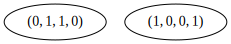

In [8]:
JupyterSplashDot(DotEliahouGraph(Factorizations(18,s)));

Thus we can take either $((0,1,1,0),(1,0,0,1))$ in a minimal presentation or $((1,0,0,1),(0,1,1,0))$.

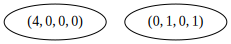

In [10]:
JupyterSplashDot(DotEliahouGraph(Factorizations(20,s)));

Hence we need $((4,0,0,0),(0,1,0,1))$ (or its symmetry) in a minimal presentation for $S$.

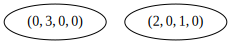

In [11]:
JupyterSplashDot(DotEliahouGraph(Factorizations(21,s)));

This implies that $((0,3,0,0),(2,0,1,0))$ (or its symmetry) is required as a minimal relation for $S$.

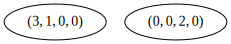

In [12]:
JupyterSplashDot(DotEliahouGraph(Factorizations(22,s)));

Here we see that either $((3,1,0,0),(0,0,2,0))$ or its symmetry is needed as a relation for $S$.

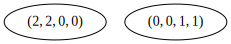

In [13]:
JupyterSplashDot(DotEliahouGraph(Factorizations(24,s)));

A new minimal relation pops up: $((2,2,0,0),(0,0,1,1))$.

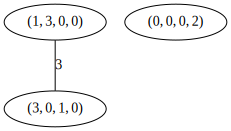

In [14]:
JupyterSplashDot(DotEliahouGraph(Factorizations(26,s)));

Here (not counting symmetry) we have two choices to add to our set or minimal relations for $S$, since we can choose two ways of "connecting" the two $R$-classes of the factorizations of 26 in $S$, say $((1,3,0,0),(0,0,0,2))$ or $((3,0,1,0),(0,0,0,2))$. 

Observe that the relations arising from elements in the same $R$-class are already a consequence of preceding minimal relations. In this example by removing the common part from $(1,3,0,0)$ and $(3,0,1,0)$, that is, $(1,0,0,0)$, we obtain that $((0,3,0,0),(2,0,1,0))$ is in $\ker\varphi_S$, but this relation was already added when we had a look at the factorizations of $26-5=21$.

By putting all these relations together we obtain a minimal presentation for $S$.

In [14]:
MinimalPresentation(s);

[ [ [ 0, 0, 0, 2 ], [ 1, 3, 0, 0 ] ], [ [ 0, 0, 1, 1 ], [ 2, 2, 0, 0 ] ],   [ [ 0, 0, 2, 0 ], [ 3, 1, 0, 0 ] ], [ [ 0, 1, 0, 1 ], [ 4, 0, 0, 0 ] ],   [ [ 0, 1, 1, 0 ], [ 1, 0, 0, 1 ] ], [ [ 0, 3, 0, 0 ], [ 2, 0, 1, 0 ] ] ]

Actually, we have obtained all possible minimal presentations for $S$, which essentially (up to symmetry) are two.

In [15]:
AllMinimalRelationsOfNumericalSemigroup(s);

[ [ [ 1, 0, 0, 1 ], [ 0, 1, 1, 0 ] ], [ [ 1, 3, 0, 0 ], [ 0, 0, 0, 2 ] ],   [ [ 2, 0, 1, 0 ], [ 0, 3, 0, 0 ] ], [ [ 2, 2, 0, 0 ], [ 0, 0, 1, 1 ] ],   [ [ 3, 0, 1, 0 ], [ 0, 0, 0, 2 ] ], [ [ 3, 1, 0, 0 ], [ 0, 0, 2, 0 ] ],   [ [ 4, 0, 0, 0 ], [ 0, 1, 0, 1 ] ] ]

## Minimal presentations and binomial ideals

Let $S$ be a numerical semigroup minimally generated by $\{n_1,\dots,n_e\}$. Let $K$ be a field and $K[x_1,\dots,x_e]$ be the polynomial ring on the variables $x_1,\dots, x_e$ with coefficients in $K$. 

Let $t$ be another unknown. We can define the subring $K[S]=K[t^s :s \in S]=K[t^{n_1},\dots,t^{n_e}]\subseteq K[t]$, which is known as the semigroup ring of $S$. Let $\psi_S:K[x_1,\dots,x_e]\to K[t]$ be the unique ring homomorphism determined by $\psi_S(x_i)=t^{n_i}$. 

For $a=(a_1,\dots,a_e)\in \mathbb{N}^e$, write $x^a=x_1^{a_1}\cdots x_e^{a_e}$. Clearly, $\psi_S(x^a)=t^{\phi_S(a)}$, and consequently whenever $(a,b)\in \ker \psi_S$, we have that $x^a-x^b\in \ker \psi_S$. It is not hard to prove that 
$$
\ker \psi_S = \langle x^a - x^b : (a,b)\in \ker \varphi_S\rangle
$$
and that a set $\rho$ generates $\ker \phi_S$ as a congruence if and only if $\{ x^a-x^b : (a,b)\in \rho\}$ generates $\ker\psi_S$ as an ideal.

In [15]:
s:=NumericalSemigroup(3,5,7);;

In order to compute $\ker \psi_S$ we can use elimination in the following way.

In [19]:
x:=Indeterminate(Rationals,"x");;
y:=Indeterminate(Rationals,"y");;
z:=Indeterminate(Rationals,"z");;
t:=Indeterminate(Rationals,"t");;

We identify each variable to $t$ to the power of the corresponding minimal generator.

In [20]:
gens:=[x-t^3,y-t^5,z-t^7];;

Now, we eliminate the variable $t$.

In [22]:
gr:=GroebnerBasis(gens,EliminationOrdering([t]));

[ -t^3+x, -t^5+y, -t^7+z, x*t^2-y, x^2*t-z, -x^2+y*t, -x^3+z*t^2, x*y-z*t,   -x*z+y^2, -x^4+y*z, -x^3*y+z^2, x^2*y^3-z^3, -x*y^5+z^4, y^7-z^5 ]

In [23]:
gensi:=Filtered(gr, g->DegreeIndeterminate(g,t)=0);

[ -x*z+y^2, -x^4+y*z, -x^3*y+z^2, x^2*y^3-z^3, -x*y^5+z^4, y^7-z^5 ]

Next, we extract the exponents of the binomials obtained.

In [25]:
ed:=3;;
bintopair:=function(pp)
    local m1,m2, d1, d2, p;
    p:=pp/LeadingCoefficientOfPolynomial(pp,MonomialLexOrdering());
    m1:=LeadingMonomialOfPolynomial(p, MonomialLexOrdering());
    m2:=m1-p;
    d1:=List([1..ed], i->DegreeIndeterminate(m1,i));;
    d2:=List([1..ed], i->DegreeIndeterminate(m2,i));;
    return Set([d1,d2]);
end;

function( pp ) ... end

In [26]:
rho:=List(gensi,bintopair);

[ [ [ 0, 2, 0 ], [ 1, 0, 1 ] ], [ [ 0, 1, 1 ], [ 4, 0, 0 ] ],   [ [ 0, 0, 2 ], [ 3, 1, 0 ] ], [ [ 0, 0, 3 ], [ 2, 3, 0 ] ],   [ [ 0, 0, 4 ], [ 1, 5, 0 ] ], [ [ 0, 0, 5 ], [ 0, 7, 0 ] ] ]

This is the idea under the implementation of `GeneratorsOfKernelCongruence`.

In [27]:
GeneratorsOfKernelCongruence([[3],[5],[7]]);

[ [ [ 0, 0, 2 ], [ 3, 1, 0 ] ], [ [ 0, 0, 3 ], [ 2, 3, 0 ] ],   [ [ 0, 0, 4 ], [ 1, 5, 0 ] ], [ [ 0, 0, 5 ], [ 0, 7, 0 ] ],   [ [ 0, 1, 1 ], [ 4, 0, 0 ] ], [ [ 0, 2, 0 ], [ 1, 0, 1 ] ] ]

The resulting set does not have to be minimal in general. We can detect those factorizations that correspond to Betti elements.

In [28]:
betticand:=Set(rho, p->p[1]*MinimalGenerators(s));

[ 10, 12, 14, 21, 28, 35 ]

In [29]:
betti:=Filtered(betticand, b->Length(RClassesOfSetOfFactorizations(Factorizations(b,s)))>1);

[ 10, 12, 14 ]

In [30]:
List(betti, b->RClassesOfSetOfFactorizations(Factorizations(b,s)));

[ [ [ [ 0, 2, 0 ] ], [ [ 1, 0, 1 ] ] ], [ [ [ 4, 0, 0 ] ], [ [ 0, 1, 1 ] ] ],   [ [ [ 3, 1, 0 ] ], [ [ 0, 0, 2 ] ] ] ]

In [31]:
GeneratorsOfKernelCongruence([[3],[5],[8]]);

[ [ [ 0, 0, 1 ], [ 1, 1, 0 ] ], [ [ 0, 3, 0 ], [ 5, 0, 0 ] ],   [ [ 0, 4, 0 ], [ 4, 0, 1 ] ], [ [ 0, 5, 0 ], [ 3, 0, 2 ] ],   [ [ 2, 0, 3 ], [ 2, 6, 3 ] ] ]

## Complete intersections

Let $S$ be a numerical semigroup minimally generated by $\{n_1,\dots, n_e\}$ with $m=\operatorname{m}(S)$. The cardinality of a (any) minimal presentation is lowed bounded by $e-1$ and upper bounded by $m(m-1)/2$. 

Numerical semigroups attaining the upper bound are precisely those of maximal embedding dimension.

A numerical semigroup is a complete intersection if its number of minimal relations is $e-1$.

In [32]:
s:=NumericalSemigroup(4,6,9);;

In [33]:
MinimalPresentation(s);

[ [ [ 0, 0, 2 ], [ 0, 3, 0 ] ], [ [ 0, 2, 0 ], [ 3, 0, 0 ] ] ]

In [34]:
AsGluingOfNumericalSemigroups(s);

[ [ [ 4 ], [ 6, 9 ] ], [ [ 4, 6 ], [ 9 ] ] ]

In [33]:
IsCompleteIntersection(s);

true

It can be shown that $S$ is a complete intersection if it is either $\mathbb{N}$ or is a gluing of two complete intersection numerical semigroups.

A numerical semigroup $S$ is a gluing $S=a_1S_1+a_2S_2$ if and only if it admits a minimal presentation of the form $\sigma=\sigma_1\cup \sigma_2\cup \{(a,b)\}$, where
- $\sigma_1$ only "moves" generators in $a_1A_1$ (it is a presentation of $S_1$),
- $\sigma_2$ only "moves" generators in $a_2A_2$ (it is a presentation of $S_2$),
- $a$ is a factorization with support in $a_1A_1$, and $b$ is a factorization with support in $a_2A_2$.

$$\operatorname{Betti}(S)=a_1\operatorname{Betti}(S_1)\cup a_2\operatorname{Betti}(S_2) \cup \{a_1a_2\}.$$

In particular, free numerical semigroups have "stair-like" minimal presentations.

In [42]:
A1:=[3,5,7];;
A2:=[7,11];;
A:=Concatenation(14*A1,19*A2);
Gcd(14,19);

[ 42, 70, 98, 133, 209 ]

1

In [43]:
s:=NumericalSemigroup(A);

<Numerical semigroup with 5 generators>

In [44]:
MinimalPresentation(s);

[ [ [ 0, 0, 0, 0, 7 ], [ 0, 0, 0, 11, 0 ] ],   [ [ 0, 0, 0, 2, 0 ], [ 0, 1, 2, 0, 0 ] ],   [ [ 0, 0, 2, 0, 0 ], [ 3, 1, 0, 0, 0 ] ],   [ [ 0, 1, 1, 0, 0 ], [ 4, 0, 0, 0, 0 ] ],   [ [ 0, 2, 0, 0, 0 ], [ 1, 0, 1, 0, 0 ] ] ]

In [57]:
MinimalPresentation(NumericalSemigroup(A1));

[ [ [ 0, 0, 2 ], [ 3, 1, 0 ] ], [ [ 0, 1, 1 ], [ 4, 0, 0 ] ],   [ [ 0, 2, 0 ], [ 1, 0, 1 ] ] ]

In [58]:
MinimalPresentation(NumericalSemigroup(A2));

[ [ [ 0, 7 ], [ 11, 0 ] ] ]

The "linking relation" is `[ [ 0, 0, 0, 2, 0 ], [ 0, 1, 2, 0, 0 ] ]`.